# 0. Install Dependencies and Bring in Data

In [14]:
!pip install tensorflow==2.15.0

  Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl.metadata (5.1 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow-2.15.0-cp310-cp310-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
   ---------------------------------------- 0.0/938.6 kB ? eta -:--:--
   ---------------------- ----------------- 524.3/938.6 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 938.6/938.6 kB 3.3 MB/s eta 0:00:00
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: 

  You can safely remove it manually.
  You can safely remove it manually.


In [19]:
!pip install matplotlib scikit-learn

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [21]:
!pip install tensorflow 


  Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl.metadata (5.1 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl.metadata (20 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached tensorflow_intel-2.15.0-cp310-cp310-win_amd64.whl (300.9 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-win_amd64.whl (938 kB)
Using cached tensorboard-2.15.2-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.9.0
    Uninstalling keras-3.9.0:
      Successfully uninstalled keras-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninsta

In [18]:
pip install --upgrade tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


  Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl.metadata (20 kB)
Using cached tensorflow-2.18.0-cp310-cp310-win_amd64.whl (7.5 kB)
Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl (126 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled te

In [23]:
from tensorflow.keras.layers import TextVectorization
MAX_FEATURES = 200000 # number of words in the vocab
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

X = df['comment_text']
y = df[df.columns[2:]].values
vectorizer.adapt(X.values)


# 1. Preprocess

In [24]:
vectorized_text = vectorizer(X.values)
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks
batch_x,batch_y=dataset.as_numpy_iterator().next()

train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [25]:
train_generator=train.as_numpy_iterator()
train_generator.next()

(array([[    7,    20,  1486, ...,     0,     0,     0],
        [  312,     8,    72, ...,     0,     0,     0],
        [   53,    55,    96, ...,     0,     0,     0],
        ...,
        [   61,    44,   276, ...,     0,     0,     0],
        [28043,    10,     6, ...,     0,     0,     0],
        [  531,   187,    53, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0]], dtype=int64))

# 2. Create Sequential Model And Training

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

model = Sequential()
# Create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer
model.add(Dense(6, activation='sigmoid'))

model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 6632s 949ms/step - loss: 0.0837 - val_loss: 0.0467
Epoch 2/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4359s 616ms/step - loss: 0.0460 - val_loss: 0.0410
Epoch 3/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4730s 677ms/step - loss: 0.0410 - val_loss: 0.0375
Epoch 4/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 4833s 692ms/step - loss: 0.0376 - val_loss: 0.0330
Epoch 5/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2861s 410ms/step - loss: 0.0339 - val_loss: 0.0284
Epoch 6/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2844s 407ms/step - loss: 0.0298 - val_loss: 0.0266
Epoch 7/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2847s 408ms/step - loss: 0.0267 - val_loss: 0.0251
Epoch 8/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2851s 408ms/step - loss: 0.0246 - val_loss: 0.0225
Epoch 9/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2852s 408ms/step - loss: 0.0217 - val_loss: 0.0187
Epoch 10/10
6981/6981 ━━━━━━━━━━━━━━━━━━━━ 2856s 409ms/step - loss: 0.0199 - val_loss: 0.0160


In [33]:
model.save('toxicity10epoch.h5')

In [34]:
model.save('my_model.keras')

In [43]:
model.save('toxicity10epoch_tf')  # SavedModel (folder)


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=toxicity10epoch_tf.

<Figure size 800x500 with 0 Axes>

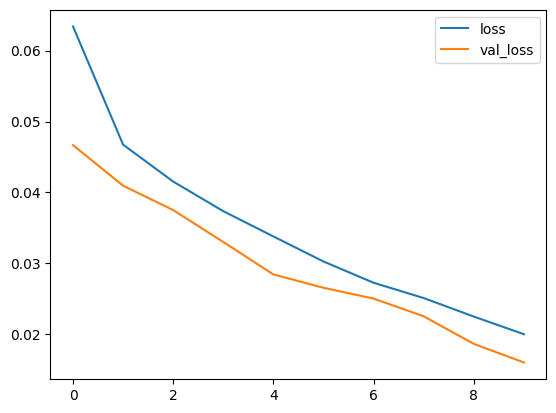

In [35]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [40]:
!pip install tensorflow

  Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl.metadata (4.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl.metadata (20 kB)
Using cached tensorflow_intel-2.18.0-cp310-cp310-win_amd64.whl (390.0 MB)
Using cached keras-3.9.0-py3-none-any.whl (1.3 MB)
Using cached ml_dtypes-0.4.1-cp310-cp310-win_amd64.whl (126 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully 

# 3. Evaluate Model

In [41]:
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [42]:
for batch in test.as_numpy_iterator():
    # Unpack the batch
    X_true, y_true = batch
    # Make a prediction
    yhat = model.predict(X_true)

    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [44]:
precision_value = pre.result().numpy()
recall_value = re.result().numpy()
accuracy_value = acc.result().numpy()

# Creating a DataFrame
df = pd.DataFrame({'Metric': ['Precision', 'Recall', 'Accuracy'],
                   'Value': [precision_value, recall_value, accuracy_value]})

# Displaying the DataFrame
print(df)

      Metric     Value
0  Precision  0.923621
1     Recall  0.920906
2   Accuracy  0.507523


# 4. Make Predictions

In [45]:
# Assume your model expects an input shape like (batch_size, sequence_length)
# Ensure that the sequence_length matches the parameters you used for the TextVectorization layer
sequence_length = 1800

# Example input text
input_text = ['You freaking suck! I am going to hit you.']

# Vectorize the input text
input_text_vectorized = vectorizer(input_text)

# Pad the sequence to match the expected sequence length
input_text_padded = tf.keras.preprocessing.sequence.pad_sequences(
    input_text_vectorized.numpy(), maxlen=sequence_length
)

# Make predictions using the model
res = model.predict(input_text_padded)

# Convert predictions to binary (0 or 1) based on a threshold (0.5 in this case)
binary_prediction = (res > 0.5).astype(int)

# Print the result
print("Predicted Toxicity:", binary_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
Predicted Toxicity: [[1 0 1 0 1 0]]
